### Conditional pipelines test

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from pipeoptz import Pipeline, Node, NodeIf

In [2]:
# Function that returns a boolean
def condition_func(threshold, value):
    return value > threshold

# Function to be executed if the condition is true
def processing_true(data):
    print("Processing in the TRUE branch")
    return data * 2

# Function to be executed if the condition is false
def processing_false(data):
    print("Processing in the FALSE branch")
    return data // 2

def f1():
    return 5

def f2():
    return 4

def integer(x):
    return x

In [3]:
# Create a pipeline
pipeline_if = Pipeline("If Pipeline")

# Create a pipeline to be executed if the condition is true
true_pipeline = Pipeline("TruePipeline")
true_pipeline.add_node(Node("T1", processing_true), predecessors={"data":"run_params:data"})
true_pipeline.add_node(Node("T2", processing_true), predecessors={"data": "T1"})
# Create a pipeline to be executed if the condition is false
false_pipeline = Pipeline("FalsePipeline")
false_pipeline.add_node(Node("F1", processing_false), predecessors={"data":"run_params:data"})

# Add nodes to the main pipeline
pipeline_if.add_node(Node("Start", f1))
pipeline_if.add_node(Node("ConditionInput", f2))
# Add a conditional node to the main pipeline
pipeline_if.add_node(NodeIf(id="IF1", condition_func=condition_func, 
                            true_pipeline=true_pipeline, false_pipeline=false_pipeline, 
                            fixed_params={"threshold": 5}),
                            predecessors={"condition_func:value":"ConditionInput", "data":"Start"})
pipeline_if.add_node(Node("End", integer), predecessors={"x": "IF1"})

Dot and png files generated.


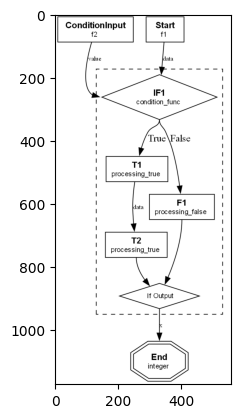

In [4]:
pipeline_if.to_dot("cond.dot")
pipeline_if.to_image("cond.png")
plt.imshow(Image.open("cond.png"))
print("Dot and png files generated.")

In [5]:
k, h, t = pipeline_if.run()
print("Result :", h[k])

Processing in the FALSE branch
Result : 2


In [6]:
pipeline_if.to_json("cond.json")
print("Json file generated.")

Json file generated.


In [7]:
print("Loading JSON")
k, h, t = Pipeline.from_json("cond.json").run()
print("Result :", h[k])

Loading JSON
Processing in the FALSE branch
Result : 2
